In [4]:
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [8]:
from astropy.coordinates import frame_transform_graph
from astropy.coordinates.matrix_utilities import matrix_product, matrix_transpose, rotation_matrix


class ArbitraryPoleFrame(coord.BaseCoordinateFrame):

    default_representation = coord.SphericalRepresentation
    default_differential = coord.SphericalCosLatDifferential

    frame_specific_representation_info = {
        coord.SphericalRepresentation: [
            coord.RepresentationMapping('lon', 'phi1'),
            coord.RepresentationMapping('lat', 'phi2'),
            coord.RepresentationMapping('distance', 'distance')],
        coord.SphericalCosLatDifferential:[
            coord.RepresentationMapping('d_lon_coslat', 'pm_phi1_cosphi2'),
            coord.RepresentationMapping('d_lat', 'pm_phi2'),
            coord.RepresentationMapping('d_distance', 'radial_velocity')],
        coord.SphericalDifferential: [
            coord.RepresentationMapping('d_lon', 'pm_phi1'),
            coord.RepresentationMapping('d_lat', 'pm_phi2'),
            coord.RepresentationMapping('d_distance', 'radial_velocity')]
    }

    pole = coord.CoordinateAttribute(frame=coord.ICRS)
    roll = coord.QuantityAttribute(default=0*u.degree)


@frame_transform_graph.transform(coord.DynamicMatrixTransform, coord.ICRS, ArbitraryPoleFrame)
def icrs_to_arbpole(icrs_coord, arbpole_frame):

    roll = arbpole_frame.roll
    pole = arbpole_frame.pole

    # Align z(new) with direction to M31
    mat1 = rotation_matrix(-pole.dec, 'y')
    mat2 = rotation_matrix(pole.ra, 'z')
    mat3 = rotation_matrix(roll, 'z')
    mat4 = rotation_matrix(90*u.degree, 'y')
    R = matrix_product(mat4, mat1, mat2, mat3)

    return R


@frame_transform_graph.transform(coord.DynamicMatrixTransform, ArbitraryPoleFrame, coord.ICRS)
def arbpole_to_icrs(arbpole_coord, icrs_frame):
    return matrix_transpose(icrs_to_arbpole(None, arbpole_coord))


"\ngalacticpole = (0.*u.deg, 0.*u.deg)\n#pole of atlas\n#(α, δ) = 77.◦16, 46.◦92\nlpole = 0.0\nbpole = 0.0\n#draw great circle \nphi1 = np.linspace(0, 360.00001, 1024)\nphi2 = np.zeros(len(phi1))\npole = coord.ICRS(ra=rapole*u.deg, dec=decpole*u.deg)\ntestobserved = ArbitraryPoleFrame(phi1=phi1*u.deg, phi2=phi2*u.deg, pole=pole)\ngal = testobserved.transform_to(coord.Galactic)\neq = testobserved.transform_to(coord.ICRS)\nplt.scatter(bestCMD['ra'][tight], bestCMD['dec'][tight], s=1)\nplt.scatter(eq.ra, eq.dec, alpha=0.1, c='black', s=1)\nplt.xlim(0, 60)\nplt.ylim(-60, 0)\n"

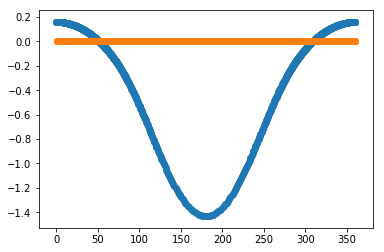

In [19]:
theta = np.linspace(0, 2*np.pi, 1000)
radius = 10.
x = radius*np.cos(theta)
y = radius*np.sin(theta)
z = np.zeros(len(theta))

c = coord.Galactocentric(x=x*u.kpc, y=y*u.kpc, z=z*u.kpc, z_sun=27 * u.pc, galcen_distance=8. * u.kpc)
galcen = c.transform_to(coord.Galactic)
plt.scatter(galcen.l, galcen.b)

pole = coord.Galactic(l=0.*u.deg, b=90*u.deg)
phi1 = np.linspace(0, 360.00001, 1024)
phi2 = np.zeros(len(phi1))
test = ArbitraryPoleFrame(phi1=phi1*u.deg, phi2=phi2*u.deg, pole=pole)
gal = test.transform_to(coord.Galactic)
plt.scatter(gal.l, gal.b)

"""
galacticpole = (0.*u.deg, 0.*u.deg)
#pole of atlas
#(α, δ) = 77.◦16, 46.◦92
lpole = 0.0
bpole = 0.0
#draw great circle 
phi1 = np.linspace(0, 360.00001, 1024)
phi2 = np.zeros(len(phi1))
pole = coord.ICRS(ra=rapole*u.deg, dec=decpole*u.deg)
testobserved = ArbitraryPoleFrame(phi1=phi1*u.deg, phi2=phi2*u.deg, pole=pole)
gal = testobserved.transform_to(coord.Galactic)
eq = testobserved.transform_to(coord.ICRS)
plt.scatter(bestCMD['ra'][tight], bestCMD['dec'][tight], s=1)
plt.scatter(eq.ra, eq.dec, alpha=0.1, c='black', s=1)
plt.xlim(0, 60)
plt.ylim(-60, 0)
"""

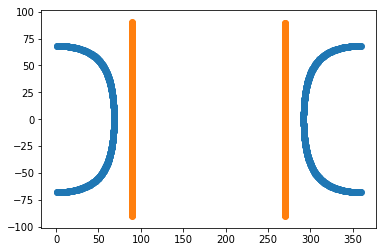

In [21]:
theta = np.linspace(0, 2*np.pi, 1000)
radius = 20.
y = radius*np.cos(theta)
z = radius*np.sin(theta)
x = np.zeros(len(theta))

c = coord.Galactocentric(x=x*u.kpc, y=y*u.kpc, z=z*u.kpc, z_sun=27 * u.pc, galcen_distance=8. * u.kpc)
galcen = c.transform_to(coord.Galactic)
plt.scatter(galcen.l, galcen.b)

pole = coord.Galactic(l=0.*u.deg, b=0*u.deg)
phi1 = np.linspace(0, 360.00001, 1024)
phi2 = np.zeros(len(phi1))
test = ArbitraryPoleFrame(phi1=phi1*u.deg, phi2=phi2*u.deg, pole=pole)
gal = test.transform_to(coord.Galactic)
plt.scatter(gal.l, gal.b)

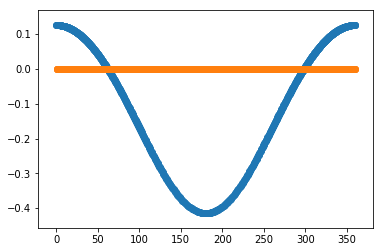

In [87]:
from astropy.coordinates.matrix_utilities import rotation_matrix
n = 1000
alpha = np.linspace(0, 2*np.pi, n)
radius = 15.
x = radius*np.cos(alpha)
y = radius*np.sin(alpha)

vx = -220*np.sin(alpha)
vy = 220*np.cos(alpha)

r0 = np.zeros((3, n))
r0[0] = x
r0[1] = y

v0 = np.zeros((3, n))
v0[0] = vx
v0[1] = vy

theta =0.*u.deg
phi = 0.*u.deg
R2 = rotation_matrix(phi, "z")
R1 = rotation_matrix(theta, "y")
(x, y, z) = R1.dot(R2).dot(r0)
(vx, vy, vz) = R1.dot(R2).dot(v0)

c = coord.Galactocentric(x=x*u.kpc, y=y*u.kpc, z=z*u.kpc, z_sun=27 * u.pc, galcen_distance=8. * u.kpc)
galcen = c.transform_to(coord.Galactic)
plt.scatter(galcen.l, galcen.b)

pole = coord.Galactic(l=phi, b=theta-90*u.deg)
phi1 = np.linspace(0, 360.00001, 1024)
phi2 = np.zeros(len(phi1))
test = ArbitraryPoleFrame(phi1=phi1*u.deg, phi2=phi2*u.deg, pole=pole)
gal = test.transform_to(coord.Galactic)
plt.scatter(gal.l, gal.b)


In [88]:
pot = gp.NFWPotential.from_circular_velocity(v_c=200*u.km/u.s,
                                             r_s=10.*u.kpc,
                                             units=galactic)


In [103]:
ics = gd.PhaseSpacePosition(pos=[x,y,z] * u.kpc,
                            vel=[vx,vy,vz] * u.km/u.s)
orbit = gp.Hamiltonian(pot).integrate_orbit(ics, dt=2., n_steps=200)


In [117]:
#norbits = 512
new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 1.,
                           size=(n,3)).T * u.pc
new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1.,
                           size=(n,3)).T * u.km/u.s

new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = gp.Hamiltonian(pot).integrate_orbit(new_ics, dt=2., n_steps=2000)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

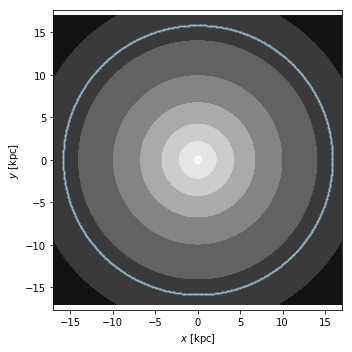

In [104]:
grid = np.linspace(-(radius+2),(radius +2) ,64)
fig,ax = plt.subplots(1, 1, figsize=(5,5))
fig = pot.plot_contours(grid=(grid,grid,0), cmap='Greys', ax=ax)
fig = orbit[-1].plot(['x', 'y'], color='#9ecae1', s=5., alpha=0.5,
                      axes=[ax])
ax.set_aspect('equal')

In [105]:
orbit.xyz.shape

(3, 201, 1000)

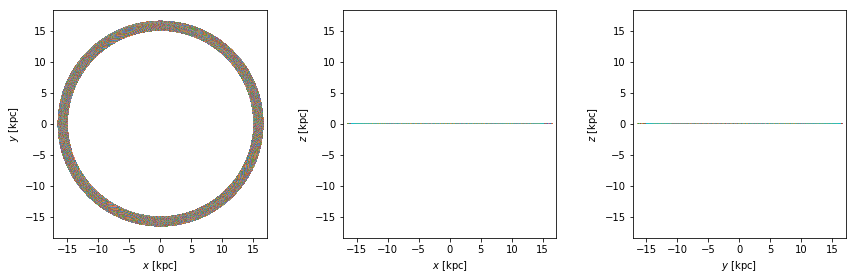

In [109]:
grid = np.linspace(-(radius+2),(radius +2) ,64)
#fig,axes = plt.subplots(1, 3, figsize=(5,5))
#for ax in axes:
#    fig = pot.plot_contours(grid=(grid,grid,0), cmap='Greys', ax=ax)
fig = orbits.plot(marker=',', linestyle='none', alpha=0.5)
#fig.set_aspect('equal')